Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Ling Lu"
COLLABORATORS = ""

---

# Homework 2

Submit your assignment as a Jupyter notebook file called `macid_hw2.ipynb`, where `macid` is replaced with your MacID from your McMaster email address. (For example: since my McMaster email address is pocucan@mcmaster.ca, I would submit a file called `pocucan_hw2.ipynb`.) Submit this file to the appropriate MacDrive link by 


To complete your assignment, edit the function definitions in this template (then rename the file appropriately, as above). (Don't forget to use appropriate `return()` statements in your functions!) **Do not alter any other part of this template.**

While developing and testing your code, it might be helpful to use
`print` statements, but please remove them before submitting your solution. The template contains several `assert` statements that when executed will test your code.

Any file submitted for grading that does not conform to the specifications above will lead to a grade of zero on the assignment.

Before submitting your solution, you should make sure that it runs properly. To do this, you can open it in the Jupyter notebook server that comes installed with Anaconda, or you can use the McMaster Jupyter server, by going to the website https://mcmaster.syzygy.ca/. (Try running `Kernel > Restart & Run all` from the menu to run all of your code from scratch and make sure nothing is left out.) Feel free to use the Spyder IDE, or some other IDE, to develop your code before entering it into the Jupyter notebook that you submit.

Your grade for each question will depend on whether or not your code correctly handles not just the test cases provided in the template, but other test cases that will be run on your solutions.

Do not leave this assignment until the last minute; last-minute computer/internet issues on your part are your problem, not ours ...

Late assignments will be penalized 25% per day.

All work submitted for grading must be your own. You may discuss homework problems and related material with other students, but you must not submit work copied from others or from the internet.  If you use any internet resources for help, you **must** list them as comments (##) in your answer. 

Do not copy code from any other students, this is the fastest way for me to give you a 0. 

### REMOVE ALL raise NotImplemented() lines from your code!

### REMOVE ALL raise NotImplemented() lines from your code!

In [2]:
import numpy as np # import numpy module 
import matplotlib.pyplot as pyplot # import pyplot module 
from scipy import optimize as optimize # non linear function 

## 1. Analysis on Linear Discrete Systems (4 points)


<img src="https://static.fjcdn.com/pictures/Bunny_17cbfa_2365519.jpg
" width="400" height="400" />



The following system is based on a modified version of decrete lotka voltera equations. Let $r$ and $w$ represent the rabbit and wolf population. The discrete system is provided as follows: 

$$ r^{(t)} = -0.92171773 w^{(t-1)} + 1.790010625  r^{(t-1)}$$

$$ w^{(t)} = 1.29798624 r^{(t-1)} - 0.51438081 w^{(t-1)} $$

Find the non-trivial equilibrium point of this system, and provide it is as a vector `answer` as a `(2,1)` matrix. 

In [3]:
def question_1():
    # YOUR CODE HERE
    A=np.matrix([1.790010625,-0.92171773,1.29798624,-0.51438081]).reshape((2,2))
    AP=A/np.linalg.eig(A)[0][0]
    v=np.linalg.eig(AP)[1][:,0].reshape(2,1)
    AP=np.matrix(AP)
    answer=AP*v
    return(answer)
question_1()

matrix([[0.75927009],
        [0.65077563]])

In [4]:
# sanity checks 
assert type(question_1()) == np.matrix # check to make sure the output is a type 
assert question_1().shape == (2,1) # check to make sure of shape

# hidden tests beware

## 2. Analysis on Non-Linear Discrete Systems (4 points)

<img src="https://media.npr.org/assets/img/2017/06/03/gettyimages-453879976-59801bc8f1f6bda5175c3098bb0d9a28696394be.jpg" width="400" height="400" />



We are tracking a giant rubber ducks position on longitude and latitude coordinate system. Let $x^{(t)}$ and $y^{(t)}$ denote the position at time $t$. The position is given by the following non-linear discrete system. 


$$ x^{(t+1)} = x^{(t)} +  1.9x^{(t)}(1 -  x^{(t)}) -  x^{(t)} y^{(t)} $$

$$ y^{(t+1)} = y^{(t)} +  1.9y^{(t)}(1 -  y^{(t)}) -  x^{(t)} y^{(t)} $$



Find the single equilibrium point of this system, where both $x^\star$ and $y^\star$ are greater than 0, and provide it is as a vector `answer` as a `(2,1)` matrix.

In [5]:

def question_2():
    """
    Find equilibrium point of the homing pigeon system.
    
    Return it as a (2,1) np.matrix type. 
    
    """
    
    # YOUR CODE HERE
    def b(x):
        output=np.matrix(np.zeros((2,1)))
        output[0,0]=x[0,0]+1.9*x[0,0]*(1-x[0,0])-x[0,0]*x[1,0]
        output[1,0]=x[1,0]+1.9*x[1,0]*(1-x[1,0])-x[0,0]*x[1,0]
        return(output)
    def ff(x):
        return(-x + b(x))
    def wrapper_ff(x):
        x=np.matrix(x).reshape((2,1))
        output=ff(x)
        return(np.array(output).reshape((2,)))
    ic = np.matrix([1,2]).reshape((2,1))
    results = optimize.root(wrapper_ff,ic)
    answer = np.matrix(results.x).reshape((2,1))
    return(answer)
question_2()

matrix([[0.65517241],
        [0.65517241]])

In [6]:
# sanity checks make sure these run 
assert type(question_2()) == np.matrix # make sure type is correct
assert question_2().shape == (2,1) # make sure shape is correct
assert question_2()[0] > 0 
assert question_2()[1] > 0 # make sure both points are greater than 0 

# hidden tests beware. 

In [7]:
def question_21():
    """
    (2 points)
    
    Which type of equilibirum point did you find in the last question? (see choices below) 
    
    answer = "A" # stable 
    
    answer = "B" # lyapunov stable
    
    answer = "C" # unstable
    
    """
    
    # YOUR CODE HERE
    answer = "A"
    return(answer)
    

In [8]:

# some sanity checks, make sure these run
assert type(question_21()) == str # make sure result is a string
assert question_21() in ["A","B","C"] # make sure result is one of the above options... 


# beware hidden tests

##  Discrete Random Variables (3 points)

In lectures we covered discrete random variables, and how to generate them by first generating numbers randomely between 0, and 1, then mapping them a discrete outcome. 

The following function: `d20` rolls a 20 sided dice, often used in the game dungeons and dragons. Each number has an equal chance of showing up. 

<img src="https://clipartart.com/images/dd-logo-clipart.png" width="200" height="200" />


The function `d20` must take in a number `p` which is a float number and maps it to the respective number on the d20 die. For instance, if `p` is between 0 and 1/20 then return the integer `1`. If `p` is between 1/20 and 2/20 then return the integer `2`. Do this for all possible outcomes. (I will not give a p that is exactly on the boundary between two different outcomes). 







In [9]:
def d20(p):
    """ Rolls a d20 die """
    
    # YOUR CODE HERE
    for n in range (0,20):
        if n/20<p and p<=(n+1)/20:
            n = n+1
            return(n)
d20(0.1)

2

In [10]:
# sanity check make sure these run 
assert type(d20(0.1)) == int

# beware of hidden tests


# Model Fitting (4 points)



In class we covered data driven model development, specifically how we can fit a model to the archeological data and predict the weight of giant bird species. For this question, you are given the following weight and femur data.

<img src="https://pbs.twimg.com/media/CBEmqVHUsAA_Dn0?format=jpg&name=small" width="400" height="400" />


`femurs = np.array([0.08293535, 0.16073765, 0.23048063, 0.48611004, 0.74620052,
       0.92089422, 0.93408545, 1.06110503, 1.1135267 , 1.24930855,
       1.43741203, 1.50996141, 1.53050224, 1.56359314, 1.63460286,
       1.93889283, 2.2085813 , 2.48029868, 2.67241209, 2.8548838 ,
       3.32500923, 4.5265359 , 5.13405133, 5.49089323, 6.06015127,
       6.88653084, 7.00052689, 7.18826093, 7.22625111, 7.34739615,
       7.36256519, 7.38957423, 7.43074601, 7.79746316, 8.58583885,
       8.67286156, 8.8732313 , 8.91454195, 9.03698764, 9.25965744])`
       
       
`weights = np.array([ 99.99312249,  99.97417409,  99.94692383,  99.76459046,
        99.44814547,  99.16346075,  99.13966491,  98.89434011,
        98.78465757,  98.47820429,  98.00215049,  97.80318973,
        97.74535508,  97.65081108,  97.44230056,  96.46681263,
        95.50286047,  94.45364881,  93.67429541,  92.91249279,
        90.89996484,  86.22760438,  84.757831  ,  84.39436322,
        84.85468594,  88.56073134,  89.42019085,  91.04733806,
        91.40998551,  92.64452359,  92.8076506 ,  93.10289981,
        93.56489595,  98.34664832, 113.22963302, 115.30670284,
       120.45103923, 121.57624117, 125.04521705, 131.88375142])`
        
        
 
 
 
Fit an appropriate model to the data, optimize the fit using nonlinear optimize, and predict the weight of a bird A with femur length `4`, and bird B with femur length `8.5`. You should probably open up a seperate notebook to run your model fitting procedure. 

Place your answers within the function `bird_weights` as `bird_weight_A` and `bird_weight_B`. 



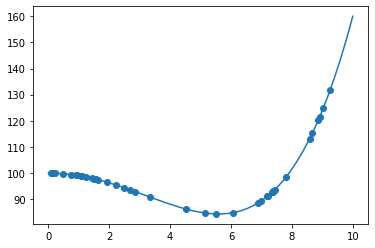

In [11]:
femurs = np.array([0.08293535, 0.16073765, 0.23048063, 0.48611004, 0.74620052, 0.92089422, 0.93408545, 1.06110503, 1.1135267 , 1.24930855, 1.43741203, 1.50996141, 1.53050224, 1.56359314, 1.63460286, 1.93889283, 2.2085813 , 2.48029868, 2.67241209, 2.8548838 , 3.32500923, 4.5265359 , 5.13405133, 5.49089323, 6.06015127, 6.88653084, 7.00052689, 7.18826093, 7.22625111, 7.34739615, 7.36256519, 7.38957423, 7.43074601, 7.79746316, 8.58583885, 8.67286156, 8.8732313 , 8.91454195, 9.03698764, 9.25965744])
weights = np.array([ 99.99312249, 99.97417409, 99.94692383, 99.76459046, 99.44814547, 99.16346075, 99.13966491, 98.89434011, 98.78465757, 98.47820429, 98.00215049, 97.80318973, 97.74535508, 97.65081108, 97.44230056, 96.46681263, 95.50286047, 94.45364881, 93.67429541, 92.91249279, 90.89996484, 86.22760438, 84.757831 , 84.39436322, 84.85468594, 88.56073134, 89.42019085, 91.04733806, 91.40998551, 92.64452359, 92.8076506 , 93.10289981, 93.56489595, 98.34664832, 113.22963302, 115.30670284, 120.45103923, 121.57624117, 125.04521705, 131.88375142])
pyplot.scatter(femurs,weights)
def ploy_f(f,a,b,c,d,e):
    return (a*f**4 + b*f**3 +c*f**2+d*f+e)

def h(theta):
    obj=0.0
    for i in range(0,femurs.size):
        f_i=femurs[i]
        w_i=weights[i]
        obj += (w_i - ploy_f(f_i,theta[0],theta[1],theta[2],theta[3],theta[4]))**2
    return(obj)

results = optimize.minimize(h,np.array([0.1,0.1,0.1,0.1,0.1]))
results
f_lin=np.linspace(0,10)
pyplot.plot(f_lin,ploy_f(f_lin,1.59654555e-02,  6.35563395e-04, -1.00363797e+00,  6.64589597e-03,
        9.99972997e+01))

In [12]:
def bird_weights():
    """ 
    Predicted bird weights of A and B
    """
    bird_weight_A = 0
    bird_weight_B = 0
    
    # YOUR CODE HERE
    bird_weight_A = float(ploy_f(4,1.59654555e-02,  6.35563395e-04, -1.00363797e+00,  6.64589597e-03,
        9.99972997e+01))
    bird_weight_B = float(ploy_f(8.5,1.59654555e-02,  6.35563395e-04, -1.00363797e+00,  6.64589597e-03,
        9.99972997e+01))
    return(bird_weight_A, bird_weight_B)
bird_weights()

(88.09350842916, 111.27193740416814)

In [13]:
# note that the weights of both birds must be within +/- 1 lbs of precision. So for example if the true weight was 
# 10 then if you estimated 11 or 9, you would get full marks!

# beware of hidden tests 

# THIS IS THE END OF THE ASSIGNMENT, PLEASE SUBMIT TO THIS MACDRIVE LINK WITH THIS ASSIGNMENT RENAMED ACCORDING TO YOUR MACID 

https://macdrive.mcmaster.ca/u/d/818705de222f47838a63/
